In [ ]:
!pip install --upgrade pip -q
!pip install -q ktrain

     |████████████████████████████████| 1.5MB 14.5MB/s 
     |████████████████████████████████| 25.3 MB 92.9 MB/s 
     |████████████████████████████████| 6.8 MB 93.9 MB/s 
     |████████████████████████████████| 981 kB 103.5 MB/s 
     |████████████████████████████████| 263 kB 68.1 MB/s 
     |████████████████████████████████| 1.9 MB 78.3 MB/s 
     |████████████████████████████████| 1.2 MB 70.1 MB/s 
     |████████████████████████████████| 468 kB 60.9 MB/s 
     |████████████████████████████████| 883 kB 70.7 MB/s 
     |████████████████████████████████| 3.2 MB 75.7 MB/s 


In [ ]:
# Generic
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings, gc
warnings.filterwarnings("ignore")


# Tensorflow
import tensorflow as tf

# ktrain
import ktrain
from ktrain import text

# sklearn
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import files
upload = files.upload()

Saving drugsComTest_raw.tsv to drugsComTest_raw.tsv


In [ ]:
from google.colab import files
upload = files.upload()

Saving drugsComTrain_raw.tsv to drugsComTrain_raw.tsv


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161297 entries, 0 to 161296
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   161297 non-null  int64  
 1   drugName     161297 non-null  object 
 2   condition    160398 non-null  object 
 3   review       161297 non-null  object 
 4   rating       161297 non-null  float64
 5   date         161297 non-null  object 
 6   usefulCount  161297 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 8.6+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 320 entries, 55 to 161046
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   320 non-null    int64  
 1   drugName     320 non-null    object 
 2   condition    320 non-null    object 
 3   review       320 non-null    object 
 4   rating       320 non-null    float64
 5   date         320 non-null    objec

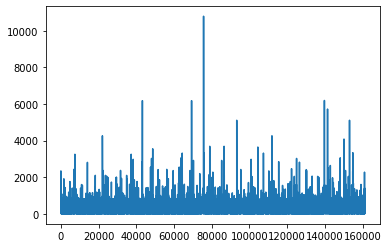

In [ ]:
df = pd.read_csv("drugsComTrain_raw.tsv", sep='\t')
df.info()
df['review'].str.len().plot()
maxer=df[df['review'].str.len()>1000]
maxer.info()

In [ ]:
df1 = pd.read_csv("drugsComTrain_raw.tsv", sep='\t')

df1.info()
p=df1[df1['review'].str.len()<=1000]
df1=p
drug1=pd.cut(df1.rating,bins=[0,8.00000,10],labels=[0,1],) 
df1.insert(3,'test',drug1) ##insert the review score
df1.head(4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161297 entries, 0 to 161296
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   161297 non-null  int64  
 1   drugName     161297 non-null  object 
 2   condition    160398 non-null  object 
 3   review       161297 non-null  object 
 4   rating       161297 non-null  float64
 5   date         161297 non-null  object 
 6   usefulCount  161297 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 8.6+ MB


,Unnamed: 0,drugName,condition,test,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,1,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,0,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,92703,Lybrel,Birth Control,0,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,0,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10


In [ ]:
df2 = pd.read_csv("drugsComTest_raw.tsv", sep='\t')

df2.info()
p=df2[df2['review'].str.len()<=1000]
df2=p
drug1=pd.cut(df2.rating,bins=[0,8.00000,10],labels=[0,1],) 
df2.insert(3,'test',drug1) ##insert the review score
df2.head(4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53766 entries, 0 to 53765
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   53766 non-null  int64  
 1   drugName     53766 non-null  object 
 2   condition    53471 non-null  object 
 3   review       53766 non-null  object 
 4   rating       53766 non-null  float64
 5   date         53766 non-null  object 
 6   usefulCount  53766 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 2.9+ MB


,Unnamed: 0,drugName,condition,test,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,1,"""I&#039;ve tried a few antidepressants over th...",10.0,"February 28, 2012",22
1,206473,Mesalamine,"Crohn's Disease, Maintenance",0,"""My son has Crohn&#039;s disease and has done ...",8.0,"May 17, 2009",17
2,159672,Bactrim,Urinary Tract Infection,1,"""Quick reduction of symptoms""",9.0,"September 29, 2017",3
3,39293,Contrave,Weight Loss,1,"""Contrave combines drugs that were used for al...",9.0,"March 5, 2017",35


In [ ]:
frames = [df1, df2]
df = pd.concat(frames)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214664 entries, 0 to 53765
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype   
---  ------       --------------   -----   
 0   Unnamed: 0   214664 non-null  int64   
 1   drugName     214664 non-null  object  
 2   condition    213470 non-null  object  
 3   test         214664 non-null  category
 4   review       214664 non-null  object  
 5   rating       214664 non-null  float64 
 6   date         214664 non-null  object  
 7   usefulCount  214664 non-null  int64   
dtypes: category(1), float64(1), int64(2), object(4)
memory usage: 13.3+ MB


In [ ]:
from sklearn.model_selection import train_test_split

train, testing = train_test_split(df, test_size=0.2, random_state=41)

In [ ]:
df=train

In [ ]:
train["rating"].mean()

6.983736192067827

In [ ]:
train["rating"].median()

8.0

In [ ]:
testing["rating"].median()

8.0

In [ ]:
testing["rating"].mean()

7.013951971676799

In [ ]:
# Data Split
target = ['test']
data = ['review']

X = df[data]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.25, random_state=42)

In [ ]:
# Common Parameters
max_len = 512
batch_size = 6
learning_rate = 5e-5
epochs = 12

In [ ]:
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=2),
    tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5'),
    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
]
# Data Split
target = ['test']
data = ['review']

X = df[data]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state=42)
# Transformer electra
model_ ="roberta-base"
t_mod = text.Transformer(model_, classes = [0,1], maxlen=512)


'''Converting split data to list [so it can processed]'''
#train
X_tr = X_train['review'].tolist()
y_tr = y_train['test'].tolist()

#test
X_ts = X_test['review'].tolist()
y_ts = y_test['test'].tolist()


# Pre-processing training & test data
train = t_mod.preprocess_train(X_tr,y_tr)
test = t_mod.preprocess_train(X_ts,y_ts)

# Model Classifier
model = t_mod.get_classifier()

learner = ktrain.get_learner(model, train_data=train, val_data=test, batch_size=6)
learner.fit_onecycle(learning_rate, epochs = 14, callbacks=my_callbacks)
e = learner.validate(class_names=t_mod.get_classes())


preprocessing train...
language: en
train sequence lengths:
	mean : 84
	95percentile : 145
	99percentile : 153


Is Multi-Label? False
preprocessing train...
language: en
train sequence lengths:
	mean : 84
	95percentile : 146
	99percentile : 153


Is Multi-Label? False





begin training using onecycle policy with max lr of 5e-05...
Epoch 1/14
22898/22898 [==============================] - 10412s 453ms/step - loss: 0.4045 - accuracy: 0.8161 - val_loss: 0.3487 - val_accuracy: 0.8510
Epoch 2/14
22898/22898 [==============================] - 10405s 453ms/step - loss: 0.3310 - accuracy: 0.8597 - val_loss: 0.3375 - val_accuracy: 0.8581
Epoch 3/14
22898/22898 [==============================] - 10403s 453ms/step - loss: 0.3058 - accuracy: 0.8730 - val_loss: 0.3420 - val_accuracy: 0.8597
Epoch 4/14
22898/22898 [==============================] - 10396s 453ms/step - loss: 0.2940 - accuracy: 0.8810 - val_loss: 0.3618 - val_accuracy: 0.8441
              precision    recall  f1-score   support

           0       0.92      0.76      0.83     17708
           1       0.78      0.93      0.85     16639

    accuracy                           0.84     34347
   macro avg       0.85      0.85      0.84     34347
weighted avg       0.86      0.84      0.84     34347



In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
predictor = ktrain.get_predictor(learner.model, t_mod)

In [ ]:
model_save_name = 'roBERT.pt'
path = F"/content/gdrive/My Drive/{model_save_name}" 
predictor.save(path)

In [ ]:
testing

,Unnamed: 0,drugName,condition,test,review,rating,date,usefulCount
32329,29342,Topiramate,Migraine Prevention,0,"""It lessened the frequency of my migraines. Bu...",5.0,"February 9, 2016",34
121922,168380,Docusate / senna,"Constipation, Acute",1,"""I am on painkillers for my back and I don&#03...",10.0,"June 24, 2013",10
77463,9344,Lo Loestrin Fe,Birth Control,0,"""I have been on this pill for a little over 3 ...",1.0,"January 11, 2017",3
161077,210862,Mirtazapine,Insomnia,1,"""I took Remeron for the first time last night ...",9.0,"September 30, 2015",95
158571,49342,Ethinyl estradiol / levonorgestrel,Birth Control,0,"""I started with this pill to get off the shot ...",1.0,"March 1, 2016",6
...,...,...,...,...,...,...,...,...
20811,13144,Xolair,Urticaria,1,"""I have had CIU for over 13 years without remi...",10.0,"May 13, 2014",69
90793,161712,Remeron,Depression,1,"""Remeron is a unique medicine, since its side ...",10.0,"February 17, 2011",114
148980,226490,Etonogestrel,Birth Control,1,"""2nd insertion...period was irregular but beca...",9.0,"July 14, 2015",2
92390,217543,Clarithromycin,Bronchitis,1,"""My ailment wasn&#039;t actually bronchitis, b...",9.0,"January 20, 2014",41


In [ ]:
reloaded_predictor = ktrain.load_predictor(path)

In [ ]:
a=testing['review'].tolist()
a

['"It lessened the frequency of my migraines. But the side effects are not worth the relief it provided. It turned me into a zombie. I didn&#039;t care about anything. I couldn&#039;t even taste my food! And the worst part was it robbed me of my ability to be alarmed by the growing severity of my depression and other serious symptoms. After three months, I was GLAD to detox. 4 days clean and I can almost taste sugar again. Can&#039;t wait til the brain fog lifts."',
 '"I am on painkillers for my back and I don&#039;t know what I would do without these. You have to make to sure to take x2 pills every 12 hours for it to work right and don&#039;t miss taking them. They work, and work great."',
 '"I have been on this pill for a little over 3 months and I thought it was great at first but after a week on it I started feeling nauseous everyday and so tired. I also get random headaches and I thought it was from a cold but now I&#039;m sure it&#039;s the pill. I will be switching as soon as po

In [ ]:
c=predictor.predict(a)

In [ ]:
from pandas import DataFrame
df_pred = DataFrame(c,columns=['pred'])

In [ ]:
df_pred

,pred
0,0
1,1
2,0
3,1
4,0
...,...
42928,1
42929,1
42930,1
42931,1


In [ ]:
true=testing['test'].tolist()

In [ ]:
df_true = DataFrame(true,columns=['true'])
df_true.head()

,true
0,0
1,1
2,0
3,1
4,0


In [ ]:
import sklearn
from sklearn.metrics import confusion_matrix

In [ ]:
sklearn.metrics.confusion_matrix(df_true["true"], df_pred["pred"], labels=[0,1])

array([[16667,  5210],
       [ 1388, 19668]])

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
sklearn.metrics.f1_score(df_true["true"], df_pred["pred"], labels=[0,1])

0.8563591239604651

In [ ]:
from sklearn.metrics import classification_report
matrix = classification_report(df_true["true"],df_pred["pred"],labels=[1,0])

In [ ]:
matrix

'              precision    recall  f1-score   support\n\n           1       0.79      0.93      0.86     21056\n           0       0.92      0.76      0.83     21877\n\n    accuracy                           0.85     42933\n   macro avg       0.86      0.85      0.85     42933\nweighted avg       0.86      0.85      0.85     42933\n'

In [ ]:
testing.reindex()

,Unnamed: 0,drugName,condition,test,review,rating,date,usefulCount
8364,211261,Pancrelipase,Pancreatic Exocrine Dysfunction,0,"""I had immediate problems when I started taki...",1.0,"March 15, 2016",8
78928,99102,Lutera,Endometriosis,1,"""Much lighter periods. Hardly any cramps. Effe...",9.0,"May 30, 2013",4
91351,85324,Ethinyl estradiol / norgestimate,Birth Control,0,"""This drug was absolutely horrible. It made me...",1.0,"July 9, 2015",7
27736,204480,BuSpar,Anxiety,0,"""I take Lexapro 20mg once daily and 5mg (for n...",6.0,"May 20, 2014",52
8744,192157,Drospirenone / ethinyl estradiol,Birth Control,0,"""I have only been on this a month. I am one o...",6.0,"July 5, 2016",12
...,...,...,...,...,...,...,...,...
78594,201944,Benzoyl peroxide / clindamycin,Acne,1,"""The stuff is amazing! Dissecting cellulitis i...",10.0,"August 2, 2017",0
107843,213021,Tizanidine,Muscle Spasm,1,"""I have been on Zanflex for about 2 months and...",10.0,"July 25, 2008",111
105139,118309,Naltrexone,Opiate Dependence,1,"""I have been an opiate user for 6 years. I wou...",10.0,"February 24, 2016",39
132131,194353,Omnicef,Sinusitis,0,"""Hey it worked for me with no side effects at ...",8.0,"July 2, 2008",59


In [ ]:
df=testing

In [ ]:
anxiety=df[df['condition']=='Anxiety']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34347 entries, 8364 to 125640
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Unnamed: 0   34347 non-null  int64   
 1   drugName     34347 non-null  object  
 2   condition    34169 non-null  object  
 3   test         34347 non-null  category
 4   review       34347 non-null  object  
 5   rating       34347 non-null  float64 
 6   date         34347 non-null  object  
 7   usefulCount  34347 non-null  int64   
dtypes: category(1), float64(1), int64(2), object(4)
memory usage: 3.4+ MB


In [ ]:
anxiety.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1251 entries, 27736 to 28676
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Unnamed: 0   1251 non-null   int64   
 1   drugName     1251 non-null   object  
 2   condition    1251 non-null   object  
 3   test         1251 non-null   category
 4   review       1251 non-null   object  
 5   rating       1251 non-null   float64 
 6   date         1251 non-null   object  
 7   usefulCount  1251 non-null   int64   
dtypes: category(1), float64(1), int64(2), object(4)
memory usage: 79.5+ KB


In [ ]:
anxiety.head()

,Unnamed: 0,drugName,condition,test,review,rating,date,usefulCount
27736,204480,BuSpar,Anxiety,0,"""I take Lexapro 20mg once daily and 5mg (for n...",6.0,"May 20, 2014",52
21508,178092,Duloxetine,Anxiety,1,"""I started take this at 30mg a week ago. I hav...",10.0,"May 30, 2011",30
35826,115109,Diazepam,Anxiety,1,"""My experience with this medication has been v...",10.0,"December 21, 2013",64
83634,147526,Alprazolam,Anxiety,0,"""I&#039;ve been on Xanax for a little over a y...",7.0,"March 6, 2010",7
7902,7765,Xanax,Anxiety,0,"""I have been taking Xanax off and on for about...",8.0,"December 1, 2011",7


In [ ]:
a=anxiety['review'].tolist()
a

['"I take Lexapro 20mg once daily and 5mg (for now) three times daily. The first week I didn&#039;t notice much at all.. But now that I&#039;ve been taking it for over a week I am starting to notice it&#039;s effects. Most notably when I let it dissolve under my tongue. This medication has no notable side effects. Only downside is its mildly underpowered. To me, Lexapro is the work horse, and Buspar is a helper."',
 '"I started take this at 30mg a week ago. I have been on so many different medicines none of them work but after only a couple of days I was feeling much better. I drove my car for an hour last night for the first time. 2 years ago I got electrocuted on 440 and I started getting the worse panic attacks. I could not get out of bed most days. I have been on every medicine they make for this. None of them worked but in a week on Cymbalta I feel like I&#039;m almost my old self again. I just turned 25 and I have a 2year old son. So thank you Cymbalta. The only side effect is I 

In [ ]:
c=predictor.predict(a)

In [ ]:
from pandas import DataFrame
df_pred = DataFrame(c,columns=['pred'])

In [ ]:
df_pred

,pred
0,1
1,1
2,1
3,1
4,1
...,...
1246,1
1247,1
1248,1
1249,1


In [ ]:
df_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1251 entries, 0 to 1250
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   pred    1251 non-null   int64
dtypes: int64(1)
memory usage: 9.9 KB


In [ ]:
true=anxiety['test'].tolist()

In [ ]:
df_true = DataFrame(true,columns=['true'])
df_true.head()

,true
0,0
1,1
2,1
3,0
4,0


In [ ]:
import sklearn
from sklearn.metrics import confusion_matrix

In [ ]:
sklearn.metrics.confusion_matrix(df_true["true"], df_pred["pred"], labels=[0,1])

array([[356, 162],
       [ 18, 715]])

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
sklearn.metrics.f1_score(df_true["true"], df_pred["pred"], labels=[0,1])

0.8881987577639752

In [ ]:
from sklearn.metrics import classification_report
matrix = classification_report(df_true["true"],df_pred["pred"],labels=[1,0])

In [ ]:
matrix

'              precision    recall  f1-score   support\n\n           1       0.82      0.98      0.89       733\n           0       0.95      0.69      0.80       518\n\n    accuracy                           0.86      1251\n   macro avg       0.88      0.83      0.84      1251\nweighted avg       0.87      0.86      0.85      1251\n'

In [ ]:
              precision    recall  f1-score   support

           1       0.82      0.98      0.89       733
           0       0.95      0.69      0.80       518

    accuracy                           0.86      1251
   macro avg       0.88      0.83      0.84      1251
weighted avg       0.87      0.86      0.85      1251


In [ ]:
def speed():
  a=anxiety['review'].tolist()
  a

  c=predictor.predict(a)

  from pandas import DataFrame
  df_pred = DataFrame(c,columns=['pred'])

  df_pred

  true=anxiety['test'].tolist()

  df_true = DataFrame(true,columns=['true'])
  df_true.head()

  import sklearn
  from sklearn.metrics import confusion_matrix

  sklearn.metrics.confusion_matrix(df_true["true"], df_pred["pred"], labels=[0,1])

  from sklearn.metrics import f1_score

  sklearn.metrics.f1_score(df_true["true"], df_pred["pred"], labels=[0,1])

  from sklearn.metrics import classification_report
  matrix = classification_report(df_true["true"],df_pred["pred"],labels=[1,0])


  return matrix


In [ ]:
df["condition"].value_counts().head(50)

Birth Control                   6122
Depression                      1927
Pain                            1270
Anxiety                         1251
Acne                            1135
Bipolar Disorde                  932
Insomnia                         818
Weight Loss                      753
Obesity                          736
ADHD                             731
Diabetes, Type 2                 534
Emergency Contraception          507
High Blood Pressure              481
Vaginal Yeast Infection          472
Bowel Preparation                420
Abnormal Uterine Bleeding        409
ibromyalgia                      406
Smoking Cessation                382
Anxiety and Stress               372
Migraine                         355
Major Depressive Disorde         340
Constipation                     329
Chronic Pain                     302
Panic Disorde                    296
Urinary Tract Infection          296
Migraine Prevention              282
Osteoarthritis                   272
M

In [ ]:
anxiety=df[df['condition']=='Birth Control']

In [ ]:
speed()

'              precision    recall  f1-score   support\n\n           1       0.79      0.95      0.86      2104\n           0       0.97      0.87      0.92      4018\n\n    accuracy                           0.89      6122\n   macro avg       0.88      0.91      0.89      6122\nweighted avg       0.91      0.89      0.90      6122\n'

In [ ]:
              precision    recall  f1-score   support

           1       0.79      0.95      0.86      2104
           0       0.97      0.87      0.92      4018

    accuracy                           0.89      6122
   macro avg       0.88      0.91      0.89      6122
weighted avg       0.91      0.89      0.90      6122


In [ ]:
anxiety=df[df['condition']=='Depression']

In [ ]:
speed()

'              precision    recall  f1-score   support\n\n           1       0.79      0.97      0.87       912\n           0       0.96      0.77      0.86      1015\n\n    accuracy                           0.87      1927\n   macro avg       0.88      0.87      0.86      1927\nweighted avg       0.88      0.87      0.86      1927\n'

In [ ]:
              precision    recall  f1-score   support

           1       0.79      0.97      0.87       912
           0       0.96      0.77      0.86      1015

    accuracy                           0.87      1927
   macro avg       0.88      0.87      0.86      1927
weighted avg       0.88      0.87      0.86      1927


In [ ]:
anxiety=df[df['condition']=='Pain']

In [ ]:
speed()

'              precision    recall  f1-score   support\n\n           1       0.80      0.97      0.88       706\n           0       0.94      0.70      0.80       564\n\n    accuracy                           0.85      1270\n   macro avg       0.87      0.83      0.84      1270\nweighted avg       0.86      0.85      0.84      1270\n'

In [ ]:
              precision    recall  f1-score   support

           1       0.80      0.97      0.88       706
           0       0.94      0.70      0.80       564

    accuracy                           0.85      1270
   macro avg       0.87      0.83      0.84      1270
weighted avg       0.86      0.85      0.84      1270


In [ ]:
anxiety=df[df['condition']=='Acne']

In [ ]:
speed()

'              precision    recall  f1-score   support\n\n           1       0.82      0.97      0.89       578\n           0       0.97      0.78      0.87       557\n\n    accuracy                           0.88      1135\n   macro avg       0.89      0.88      0.88      1135\nweighted avg       0.89      0.88      0.88      1135\n'

In [ ]:
              precision    recall  f1-score   support

           1       0.82      0.97      0.89       578
           0       0.97      0.78      0.87       557

    accuracy                           0.88      1135
   macro avg       0.89      0.88      0.88      1135
weighted avg       0.89      0.88      0.88      1135


In [ ]:
anxiety=df[df['condition']=='Bipolar Disorde']

In [ ]:
speed()

'              precision    recall  f1-score   support\n\n           1       0.79      0.98      0.88       466\n           0       0.97      0.74      0.84       466\n\n    accuracy                           0.86       932\n   macro avg       0.88      0.86      0.86       932\nweighted avg       0.88      0.86      0.86       932\n'

In [ ]:
              precision    recall  f1-score   support

           1       0.79      0.98      0.88       466
           0       0.97      0.74      0.84       466

    accuracy                           0.86       932
   macro avg       0.88      0.86      0.86       932
weighted avg       0.88      0.86      0.86       932


In [ ]:
anxiety=df[df['condition']=='Insomnia']

In [ ]:
speed()

'              precision    recall  f1-score   support\n\n           1       0.80      0.96      0.87       391\n           0       0.95      0.78      0.85       427\n\n    accuracy                           0.86       818\n   macro avg       0.87      0.87      0.86       818\nweighted avg       0.88      0.86      0.86       818\n'

In [ ]:
              precision    recall  f1-score   support

           1       0.80      0.96      0.87       391
           0       0.95      0.78      0.85       427

    accuracy                           0.86       818
   macro avg       0.87      0.87      0.86       818
weighted avg       0.88      0.86      0.86       818


In [ ]:
anxiety=df[df['condition']=='Weight Loss']

In [ ]:
speed()

'              precision    recall  f1-score   support\n\n           1       0.86      0.94      0.90       487\n           0       0.88      0.71      0.79       266\n\n    accuracy                           0.86       753\n   macro avg       0.87      0.83      0.84       753\nweighted avg       0.86      0.86      0.86       753\n'

In [ ]:
              precision    recall  f1-score   support

           1       0.86      0.94      0.90       487
           0       0.88      0.71      0.79       266

    accuracy                           0.86       753
   macro avg       0.87      0.83      0.84       753
weighted avg       0.86      0.86      0.86       753


In [ ]:
              precision    recall  f1-score   support

           1       0.86      0.94      0.90       487
           0       0.88      0.71      0.79       266

    accuracy                           0.86       753
   macro avg       0.87      0.83      0.84       753
weighted avg       0.86      0.86      0.86       753


In [ ]:
anxiety=df[df['condition']=='Obesity']

In [ ]:
speed()

'              precision    recall  f1-score   support\n\n           1       0.84      0.93      0.88       429\n           0       0.89      0.75      0.81       307\n\n    accuracy                           0.85       736\n   macro avg       0.86      0.84      0.85       736\nweighted avg       0.86      0.85      0.85       736\n'

In [ ]:
              precision    recall  f1-score   support

           1       0.84      0.93      0.88       429
           0       0.89      0.75      0.81       307

    accuracy                           0.85       736
   macro avg       0.86      0.84      0.85       736
weighted avg       0.86      0.85      0.85       736


In [ ]:
anxiety=df[df['condition']=='ADHD']

In [ ]:
speed()

'              precision    recall  f1-score   support\n\n           1       0.79      0.98      0.88       365\n           0       0.98      0.75      0.85       366\n\n    accuracy                           0.86       731\n   macro avg       0.89      0.86      0.86       731\nweighted avg       0.89      0.86      0.86       731\n'

In [ ]:
              precision    recall  f1-score   support

           1       0.79      0.98      0.88       365
           0       0.98      0.75      0.85       366

    accuracy                           0.86       731
   macro avg       0.89      0.86      0.86       731
weighted avg       0.89      0.86      0.86       731


In [ ]:
anxiety=df[df['condition']=='Diabetes, Type 2']

In [ ]:
speed()

'              precision    recall  f1-score   support\n\n           1       0.88      0.95      0.92       232\n           0       0.96      0.90      0.93       302\n\n    accuracy                           0.93       534\n   macro avg       0.92      0.93      0.92       534\nweighted avg       0.93      0.93      0.93       534\n'